<a href="https://colab.research.google.com/github/tunglinwood/Learning-Material/blob/main/PCPP1E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCPP1: File Processing


**In this course, you will learn about**:

sqlite - interacting with SQLite databases;
xml - creating and processing XML files;
csv - CSV file reading and writing;
logging - basics logging facility for Python;
configparser - configuration file parser.

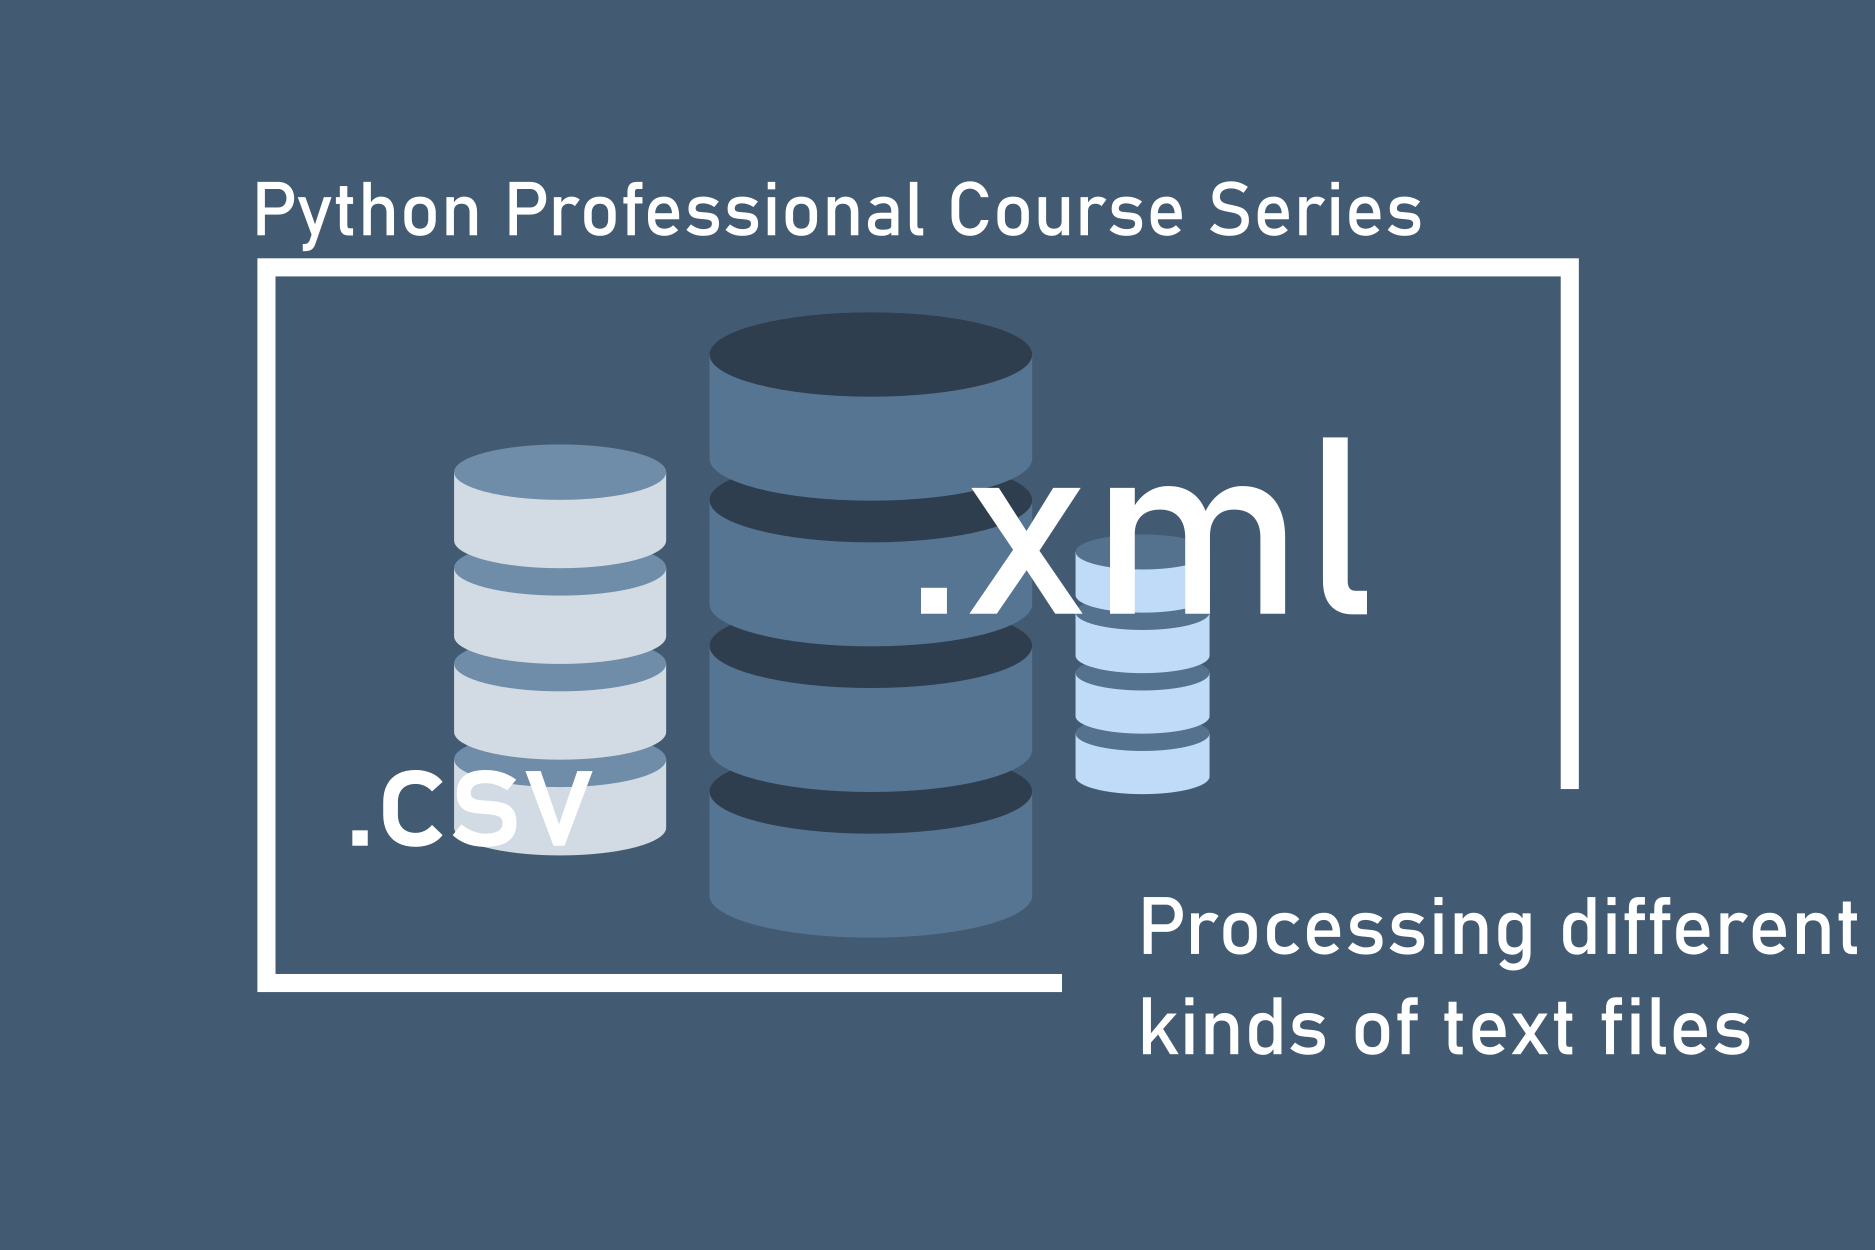



#1.1 SQLite - What is a database
What is a database?
Nowadays, social applications such as Facebook, Twitter, and Instagram are very popular. Every day many people create new accounts, and existing users add or share different content. You’ve surely noticed that the data sent to those applications are still available after a few days, or even years. Do you know how that’s possible?

Data is simply information about users, the contents of their posts, and comments. The data are all kinds of information that we can send to the application. During registration, you send the application your account data, consisting of email address, login, and password, and when you add new posts you send content that will be visible to other users. Sent data should be saved in some place that can be easily accessed. This place is a database, which is a set of information stored on a disk in a computer system. Access to the database is possible thanks to a database management system.

The database management system (DBMS) is the software responsible for:

* creating a database structure;
* inserting, updating, deleting, and searching data;
* ensuring data security;
* transaction management;
* ensuring concurrent access to data for many users;
* enabling data exchange with other database systems.

There are many free and paid database management systems on the market. The most popular of them include:

|Free|Paid|
|:-|:-|
|MySQL, PostgreSQL, SQLite|	Oracle Database, Microsoft SQL Server, IBM DB2|

Later in this course, we'll focus mainly on the SQLite system. You'll use it to create your first Python database application. Are you ready? Let's go!

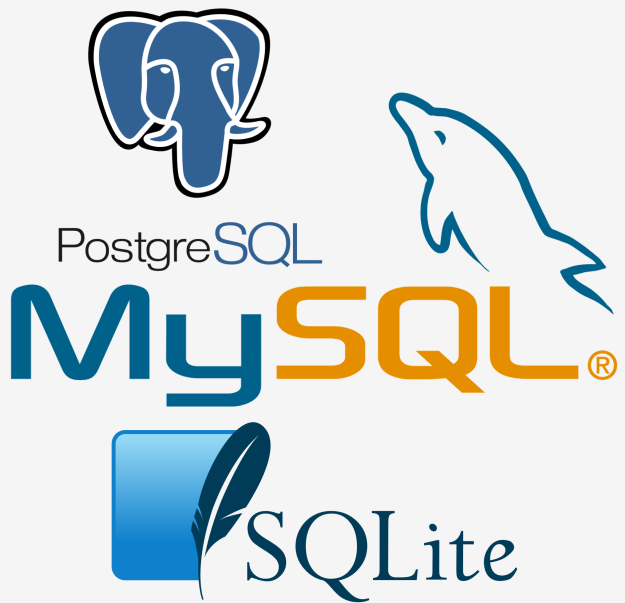

##What is SQLite and why should you use it?
Before you create your first database, we'll say a few words about SQLite, one of the most popular database management systems in the world. SQLite is actually a C library which allows the user to read and write data directly to a file. You're surprised?

The complete SQLite database is stored in only one file. Unlike other database management systems, SQLite doesn't require a separate server process to be running in order to communicate with the database.

What's more, it doesn't require any configuration at all, because it's a self-contained library enclosed in one source file. SQLite also supports transactions, which are a set of database operations that must be executed in full, or rolled back if one of them fails.

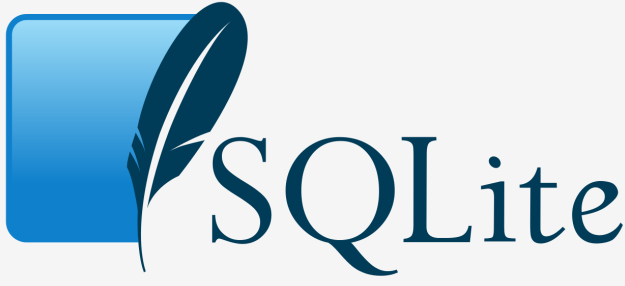

SQLite has found many uses in mobile applications (on both Android and iOS platforms) to store information about their status. In addition, it's used by companies producing software for cars and airplanes. The database file is cross-platform, which means it can be copied between 32- and 64-bit systems.

Isn't it amazing that you can transfer the database created in this course to the airplane software?

##How to work with an SQLite database using Python
You've probably already used the standard library with built-in modules many times during your adventures with Python. In this part of the course, you'll have the opportunity to learn about a new module that will allow you to create amazing applications using SQLite databases. Can you guess what it’s called? If not, don't worry, everything will be clear in a moment.

The standard Python library has a module called `sqlite3`, providing an interface compliant with the DB-API 2.0 specification described by [PEP 249](https://www.python.org/dev/peps/pep-0249/). The purpose of the DB-API 2.0 specification is to define a common standard for creating modules to work with databases in Python.

Imagine three cars that have the same necessary equipment, but were made by other manufacturers. It's exactly the same with modules implementing the DB-API 2.0 interface. Each of them has the same method required by the specification, but can be written by different programmers, and even by you.

NOTE: The `sqlite3` module has been available in Python since version 2.5.

To use the `sqlite3` module, you must import it in your script:



In [ ]:
import sqlite3

##sqlite3 – creating a database
As we already said, the SQLite database is a single file, which is saved on your computer. Each file, regardless of the operating system used, has its location (a path to a specific disk space). When you create a database, you can create it in your current working directory, or in any other location. To create a database, use the `connect` method provided by the `sqlite3` module:

In [ ]:
import sqlite3

conn = sqlite3.connect('hello.db')

The `connect` method returns the database representation as a `Connection` object. In the example above, the method takes only the database name as the argument. This means that the database will be created in the same directory as the script that wants to access it. If you'd like to create a database in the `sqlite3` directory on your C disk you can do this as follows:

In [ ]:
import sqlite3

conn = sqlite3.connect('C:\sqlite\hello.db')

It's also possible to use a special name, `:memory:`, which creates a database in RAM:

In [ ]:
import sqlite3

conn = sqlite3.connect(':memory:')


Remember that the connect method creates a database only if it cannot find a database in the given location. If a database exists, SQLite connects to it.

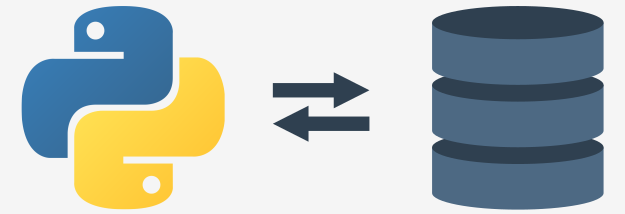

##A few words about SQL
You’ve already learned how to create a database in Python using the `sqlite3` module. It's now time to discuss how we can create its structure. For this purpose, we’ll need some knowledge of SQL.

SQL is a **Structured Query Language** for creating, modifying, and managing relational databases. It’s used by the most popular database management systems such as MySQL, PostgreSQL, and our favorite SQLite. The SQL language was developed in the 70s by IBM. Over the years, SQL has been modified by many companies that have implemented it in their products. Therefore, it became necessary to introduce a standard that would standardize its syntax.

Since the first production deployments, the following standards have been created: SQL-86, SQL-89, SQL-92, SQL:1999, SQL:2003, SQL:2006, SQL:2008, SQL:2011, SQL:2016, SQL:2019. Detailed information on each of the standards can be found in the Internet resources. It’s worth mentioning that SQLite generally implements the SQL-92 standard, with some exceptions that you can read about [here](https://www.sqlite.org/lang.html).

SQL syntax and its standards are extensive topics. Fortunately, there are many free materials available on the Internet to help you acquire some basic knowledge. We encourage you to familiarize yourself with them.

If you've never dealt with SQL before, don't worry. All examples including SQL will be explained in detail.

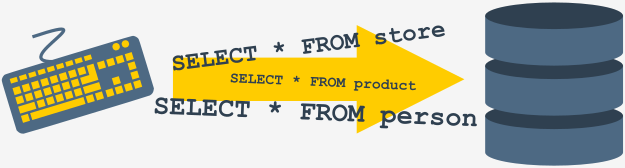

##sqlite3 – the TODO application
Have you ever forgotten to do anything during the day? If so, it's time to finally solve this problem. Let's create a simple project called **TODO**, during which we’ll create a database to store tasks (to do) along with their priorities. The structure of our database will consist of only one table called `tasks`:


tasks table

To create the above table, we’ll need to use the SQL statement `CREATE TABLE`. Its syntax looks like this:

```
CREATE TABLE table_name (
column1 datatype,
column2 datatype,
column3 datatype,
…
columnN datatype
);
```

The `CREATE TABLE` statement creates a new table in the database. In our case, it will be a table called `tasks` consisting of three columns: `id`, `name` and `priority`.


The `id` column is a primary key that allows you to uniquely identify records stored in the table. The second column called name is responsible for storing the `names` of the tasks we’ll have to do. It's not difficult to guess that these will be textual values.

For this purpose, we’ll use the `TEXT` type. The last column called priority defines the `priority` of our tasks and should store integers.

Below is the SQL code that we’ll use later in the course to create our table using the `sqlite3` module. Note the name and priority columns that contain the `NOT NULL` constraint. This will avoid creating tasks with fields equal to `NULL`.

```
CREATE TABLE tasks (
id INTEGER PRIMARY KEY,
name TEXT NOT NULL,
priority INTEGER NOT NULL
);
```

You’ll find more information on all types available in SQLite [here](https://www.sqlite.org/datatype3.html).



##sqlite3 – creating tables
When connecting to the database using the `connect` method, a `Connection` object is created. It has a very useful method called `cursor`. The method creates a `Cursor` object that allows any SQL statements to be executed in the database. What does it look like in practice? Let's look at the code responsible for creating the table called `tasks`:


In [ ]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('''CREATE TABLE tasks (
id INTEGER PRIMARY KEY,
name TEXT NOT NULL,
priority INTEGER NOT NULL
);''')

Calling the execute method `executes` the `CREATE TABLE` statement in our database. The `execute` method takes any single SQL statement and optional parameters necessary to execute the query. The variant with optional parameters will be presented when we discuss inserting data in the database.

**NOTE**: Running the above program twice will throw an exception with the following message: `sqlite3.OperationError: table tasks already exists`. This is because the statement is trying to re-create a table with the same name. The solution to this problem is to modify the query as follows:

```
CREATE TABLE IF NOT EXISTS tasks (
id INTEGER PRIMARY KEY,
name TEXT NOT NULL,
priority INTEGER NOT NULL
);
```

##sqlite3 – inserting data (part 1)
Congratulations. You’ve just created your first table in the database. It's time to fill it with data. Once again, a little knowledge of the SQL language will be invaluable, namely the `INSERT INTO` statement.

The `INSERT INTO` statement is used to insert records in a table. Its syntax is as follows:

```
INSERT INTO table_name (column1, column2, column3, ..., columnN)
VALUES (value1, value2, value3, ..., value4);
```

Using the above formula, we’re able to prepare a query that will allow us to save our first task in the database:

```
INSERT INTO tasks (id, name, priority) VALUES (1, 'My first task', 1);
```

or

```
INSERT INTO tasks (name, priority) VALUES ('My first task', 1);
```

You've probably noticed that in the second variant the `id` column is omitted. In this case, we inform the database management system of the desire to use auto-incrementation (a unique value is generated for us when a new record is inserted).

Of course, we can define the value of the `id` column ourselves, but it's more convenient not to worry about it.

The INSERT INTO statement also has a short form in which we can omit the column names:

```
INSERT INTO table_name VALUES (value1, value2, value3, ..., valueN);
```

##sqlite3 – inserting data (part 2)
Let's look at how to use the `INSERT INTO` statement in our TODO project. Analyze the code in the editor.

The mysterious characters `?` used in the `INSERT INTO` statement are query parameters that are replaced with the correct values during the execution of the statement. In the above example, the first character `?` will be replaced with `My first task`, while the second will be replaced with `l`.

This is to avoid an SQL injection attack in which malicious SQL is appended to a query that could possibly destroy our database. You can find more information about SQL injection and possible safeguard measures on the Internet.

The `execute` method, as we mentioned before, has an optional argument in the form of an array of parameters. In our case, it takes a tuple, but it can be a simple array containing the same number of elements as the query parameters.

Our code isn't working properly yet, but don't worry. In a moment, you’ll learn a new method that will fix this problem.

In [ ]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS tasks (
id INTEGER PRIMARY KEY,
name TEXT NOT NULL,
priority INTEGER NOT NULL
);''')
c.execute('INSERT INTO tasks (name, priority) VALUES (?,?)', ('My first task', 1))

##sqlite3 – inserting data (part 3)
We’re only one step away from inserting our first task in the database. All we're missing is to call the `commit` method provided by the `Connection` object. Look at the code in the editor.

The `commit` method confirms our changes (the current transaction). If you forget to call it, your changes won't be visible in the database.

In the example above, another method of the `Connection` object is used. The `close` method closes the database connection, e.g., after inserting all tasks.

**NOTE**: Restarting the program will create another task with the same name and priority, but with a different value that is auto-incremental.

In [ ]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS tasks (
id INTEGER PRIMARY KEY,
name TEXT NOT NULL,
priority INTEGER NOT NULL
);''')
c.execute('INSERT INTO tasks (name, priority) VALUES (?,?)', ('My first task', 1))
conn.commit()
conn.close()


##sqlite3 – the *executemany()* method
Performing many queries is not very efficient when we can use just one that performs the same task. Imagine a situation where you want to add three tasks to the database. If we used the `execute` method, we would have to do three separate queries.

This isn't good practice. Fortunately, the `Cursor` object offers us a method called `executemany`. Look at the code in the editor.

The `executemany` method allows you to insert multiple records at once. As an argument, it accepts an SQL statement and an array containing any number of tuples.

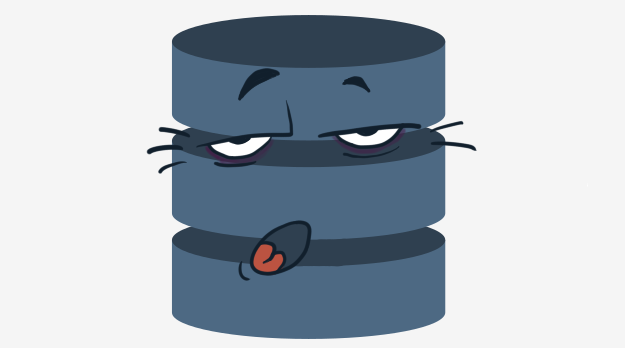

In [ ]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS tasks (
id INTEGER PRIMARY KEY,
name TEXT NOT NULL,
priority INTEGER NOT NULL
);''')
tasks = [
    ('My first task', 1),
    ('My second task', 5),
    ('My third task', 10),
]
c.executemany('INSERT INTO tasks (name, priority) VALUES (?,?)', tasks)
conn.commit()
conn.close()


##Application refactoring
**Refactoring** is a very important process during software development. The main purpose of refactoring is to improve the quality of the code. Every programmer in their career will have to refactor either their own or someone else’s code sooner or later.

A very common mistake made by young adepts of the art of programming is to repeat the same pieces of code in different places in the application. In this case, refactoring consists of creating a function containing repetitive fragments. As a result, the code’s volume is reduced, and it becomes more readable.

You've probably noticed that adding new functionalities to our `TODO` application would be very difficult. This is a sign that our application requires refactoring. Below are suggestions for changes we can make:

1. creating a class called `TODO` that will connect to the database in the constructor. If you want, you can implement a separate method called `connect` for this purpose;
2. moving the code responsible for creating the `taskstable` to the method named `create_tasks_table`;
3. creating a method called `add_task` that will get the task name and priority from the user instead of using hardcoded values.

Will we be able to easily implement, for example, the data display functionality after these changes? Find out about this later in the course.

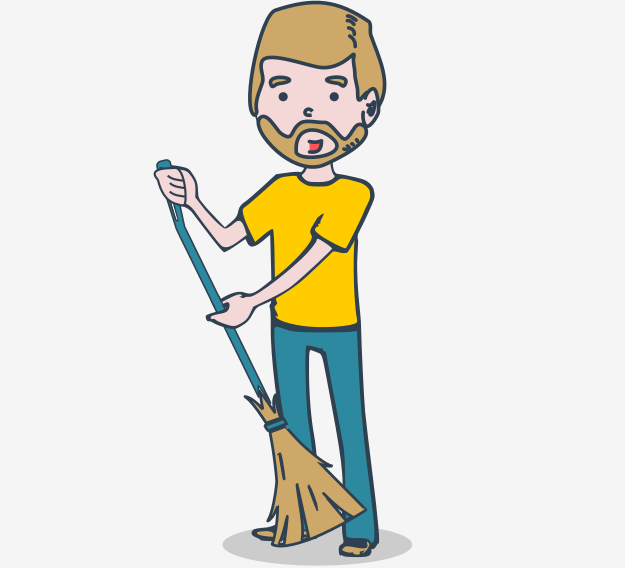

In [ ]:
import sqlite3

class Todo:
    def __init__(self):
        self.conn = sqlite3.connect('todo.db')
        self.c = self.conn.cursor()
        self.create_task_table()

    def create_task_table(self):
        self.c.execute('''CREATE TABLE IF NOT EXISTS tasks (
                     id INTEGER PRIMARY KEY,
                     name TEXT NOT NULL,
                     priority INTEGER NOT NULL
                     );''')

    def add_task(self):
        name = input('Enter task name: ')
        priority = int(input('Enter priority: '))

        self.c.execute('INSERT INTO tasks (name, priority) VALUES (?,?)', (name, priority))
        self.conn.commit()

app = Todo()
app.add_task()


##sqlite3 – reading data (part 1)

So far, we haven't displayed any information on the screen about the inserted tasks. It's time to change that. Let's see what’s in our database. We’ll first need the appropriate SQL statement, named `SELECT`.

The `SELECT` statement allows you to read data from one or more tables. Its syntax looks like this:

```
SELECT column FROM table_name;
```

or

```
SELECT column1, column2, column3, …, columnN FROM table_name;
```

or

```
SELECT * FROM table_name;
```

In the first variant, we decide to read the values saved in only one column. If we'd like to read only the names of the tasks saved in the `tasks` table, we could use the following query:

```
SELECT name FROM tasks;
```

The second variant allows you to read values from more columns. If we'd like to read the task names and their priorities, we could use the following query:

```
SELECT name, priority FROM tasks;
```

If we don’t have any specific requirements, we can read the values from all columns:

```
SELECT * FROM tasks;
```

The last variant will display the values saved in the `id`, `name` and `priority` columns.

##sqlite3 – reading data (part 2)
It probably won’t surprise you to learn that reading data saved in the database is done with the well-known `Cursor` object. After calling the `execute` method with the appropriate `SELECT` statement, the `Cursor` object is treated as an iterator. Look at the code in the editor.

Result:

```
(1, 'My first task', 1)
(2, 'My second task', 5)
(3, 'My third task', 10)
```

The variable `row` in each iteration takes a row in the form of a tuple. Access to individual columns is done using an index, e.g., `print (row [0])` will display the values saved in the `id` column.

In [ ]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
for row in c.execute('SELECT * FROM tasks'):
    print(row)
conn.close()


##sqlite3 – reading data (part 3)
If you don't want to treat the `Cursor` object as an iterator, you can use its method called `fetchall`. The `fetchall` method fetches all records (those not yet fetched from the query result). Look at the code in the editor.

Result:

```
(1, 'My first task', 1)
(2, 'My second task', 5)
(3, 'My third task', 10)
```

The `fetchall` method is less efficient than the iterator, because it reads all records into the memory and then returns a list of tuples. For small amounts of data, it doesn't matter, but if your table contains a huge number of records, this can cause memory issues.

**NOTE**: The `fetchall` method returns an empty list when no rows are available.

In [ ]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('SELECT * FROM tasks')
rows = c.fetchall()
for row in rows:
    print(row)
conn.close()


##sqlite3 – reading data (part 4)
In addition to the iterator and the `fetchall` method, the `Cursor` object provides a very useful method called `fetchone` to retrieve the next available record. Look at the code in the editor.

Result:

```
(1, 'My first task', 1)
(2, 'My second task', 5)
```

**NOTE**: The `fetchone` method returns `None` if there is no data to read.

In [ ]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('SELECT * FROM tasks')
row = c.fetchone()
print(row)
row = c.fetchone()
print(row)
conn.close()


#1.2Lab - TODO application advanced
##Scenario
Our `TODO` application requires you to add a little security and display the data saved in the database. Your task is to implement the following functionalities:

1. Create a `find_task` method, which takes the task name as its argument. The method should return the record found or `None` otherwise.
2. Block the ability to enter an empty task (the name cannot be an empty string).
3. Block the ability to enter a task priority less than 1.
4. Use the `find_task` method to block the ability to enter a task with the same name.
5. Create a method called `show_tasks`, responsible for displaying all tasks saved in the database.

Test data:

###Example input:
```
Enter task name: My first task
Enter priority: 1
```

###Example output:
```
(1, 'My first task', 1)
```

###Example input:
```
Enter task name: My second task
Enter priority: 2
```

###Example output:
```
(1, 'My first task', 1)
(2, 'My second task', 2)
```

###Example input:
```
Enter task name: My first task
Enter priority: 1
```

###Example output:
```
(1, 'My first task', 1)
(2, 'My second task', 2)
```

In [ ]:
import sqlite3


class Todo:
    def __init__(self):
        self.conn = sqlite3.connect('todo.db')
        self.c = self.conn.cursor()
        self.create_tasks_table()

    def create_tasks_table(self):
        self.c.execute('''CREATE TABLE IF NOT EXISTS tasks (
                     id INTEGER PRIMARY KEY,
                     name TEXT NOT NULL,
                     priority INTEGER NOT NULL
                     );''')

    def add_task(self):
        name = input('Enter task name: ')
        priority = int(input('Enter priority: '))

        if len(name) == 0 or priority < 1:
            return

        if self.find_task(name) is not None:
            return

        self.c.execute(
            'INSERT INTO tasks (name, priority) VALUES (?,?)',
            (name, priority))
        self.conn.commit()

    def find_task(self, name):
        for row in self.c.execute('SELECT * FROM tasks'):
            if row[1] == name:
                return row

        return None

    def show_tasks(self):
        for row in self.c.execute('SELECT * FROM tasks'):
            print(row)

app = Todo()
app.add_task()
app.show_tasks()


#1.3 Updating data
##sqlite3 – updating data
Each of the tasks created has its own priority, but what if we decide that one of them should be done earlier than the others. How can we increase its priority? We have to use the SQL statement called `UPDATE`.

The `UPDATE` statement is used to modify existing records in the database. Its syntax is as follows:

```
UPDATE table_name
SET column1 = value1, column2 = value2, column3 = value3, …, columnN = valueN
WHERE condition;
```

If we'd like to set the priority to 20 for a task with `id` equal to 1, we can use the following query:

```
UPDATE tasks SET priority = 20 WHERE id = 1;
```

**NOTE**: If you forget about the `WHERE` clause, all data in the table will be updated.

As before, we execute all SQL statements using the `execute` method. Look at the code in the editor.

In [ ]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('UPDATE tasks SET priority = ? WHERE id = ?', (20, 1))
c.commit()
c.close()


##sqlite3 – deleting data
After completing a task, we would like to remove it from our database. To do this, we must use the SQL statement called DELETE:

```
DELETE FROM table_name WHERE condition;
```

Let's look at what removing the task with `id = 1` might look like:

```
DELETE FROM tasks WHERE id = 1;
```

**NOTE**: If you forget about the `WHERE` clause, all data in the table will be deleted.

Look at the code in the editor to see how to delete a record using the `sqlite3` module.



In [ ]:
import sqlite3

conn = sqlite3.connect('todo.db')
c = conn.cursor()
c.execute('DELETE FROM tasks WHERE id = ?', (1,))
c.commit()
c.close()


#1.4 Lab - TODO application advanced pt.2
##Scenario
The application is almost ready. Let's add the missing functionalities to it:

1. Create a method called `change_priority`, responsible for updating task priority. The method should get the id of the task from the user and its new priority (greater than or equal to 1).
2. Create a method called `delete_task`, responsible for deleting single tasks. The method should get the task id from the user.
3. Implement a simple menu consisting of the following options:

```
1. Show Tasks
2. Add Task
3. Change Priority
4. Delete Task
5. Exit
```

where:

* Show Tasks (calls the `show_tasks` method)
* Add Task (calls the `add_task` method)
* Change Priority (calls the `change_priority` method)
* Delete Task (calls the `delete_task` method)
* Exit (interrupts program execution)

The program should obtain one of these options from the user, and then call the appropriate method of the `TODO` object. Choosing option 5 must terminate the program. A menu should be displayed in an infinite loop so that the user can choose an option multiple times.


In [ ]:
import sqlite3


class Todo:
    def __init__(self):
        self.conn = sqlite3.connect('todo.db')
        self.c = self.conn.cursor()
        self.create_tasks_table()

    def create_tasks_table(self):
        self.c.execute('''CREATE TABLE IF NOT EXISTS tasks (
                     id INTEGER PRIMARY KEY,
                     name TEXT NOT NULL,
                     priority INTEGER NOT NULL
                     );''')

    def add_task(self):
        name = input('Enter task name: ')
        priority = int(input('Enter priority: '))

        if len(name) == 0 or priority < 1:
            return

        if self.find_task(name) is not None:
            return

        self.c.execute(
            'INSERT INTO tasks (name, priority) VALUES (?,?)',
            (name, priority))
        self.conn.commit()

    def find_task(self, name):
        self.c.execute('SELECT * FROM tasks WHERE name = ?', (name,))
        return self.c.fetchone()

    def show_tasks(self):
        for row in self.c.execute('SELECT * FROM tasks'):
            print(row)

    def change_priority(self):
        task_id = int(input('Enter task id: '))
        new_priority = int(input('Enter new priority: '))

        if new_priority < 1:
            return

        self.c.execute(
            'UPDATE tasks SET priority = ? WHERE id = ?',
            (new_priority, task_id))
        self.conn.commit()

    def delete_task(self):
        task_id = int(input('Enter task id: '))

        self.c.execute('DELETE FROM tasks WHERE id = ?', (task_id, ))
        self.conn.commit()


class Menu:
    def __init__(self):
        self.app = Todo()

    def open(self):
        self.open = True
        while self.open:
            self.draw()
            option = int(input('Choose an option [1-5]: '))

            if option == 1:
                self.app.show_tasks()
            elif option == 2:
                self.app.add_task()
            elif option == 3:
                self.app.change_priority()
            elif option == 4:
                self.app.delete_task()
            elif option == 5:
                self.close()
            else:
                input('Option not found. Please choose an option again...')

    def draw(self):
        print('1. Show Tasks')
        print('2. Add Task')
        print('3. Change Priority')
        print('4. Delete Task')
        print('5. Exit')

    def close(self):
        self.open = False

menu = Menu()
menu.open()


#2.1 File processing - XML files
##XML processing in Python
Python is commonly used to process various types of data. Perhaps, while working as a programmer, you'll have to read or create a data file in the XML format. Soon, doing that will be a piece of cake.

The standard Python library offers some interesting modules for working with XML:

* **xml.etree.ElementTree** – has a very simple API for analyzing and creating XML data. It's an excellent choice for people who have never worked with the Document Object Model (DOM) before.
* **xml.dom.minidom**  – is the minimum implementation of the Document Object Model (DOM). Using the DOM, the approach to an XML document is slightly different, because it's parsed into a tree structure in which each node is an object.
* **xml.sax** – SAX is an acronym for “Simple API for XML”. SAX is an interface in Python for event-driven XML document analysis. Unlike the above modules, analyzing a simple XML document using this module requires more work.
In this course, you'll learn how to create and process XML documents using the `xml.etree.ElementTree` module. Let's not waste any time. Let's go!

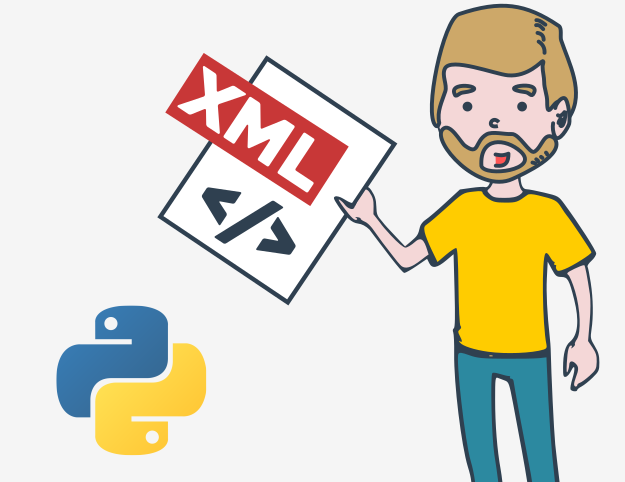

##What is XML?
Extensible Markup Language (XML) is a markup language intended for storing and transporting data, e.g., by systems using the SOAP communication protocol. One of its main advantages is the ability to define your own tags that make the document more readable to humans. XML is a standard recommended by the W3C organization. Let's look at what elements XML documents contain:

* **prolog** – the first (optional) line of the document. In the prolog, you can specify character encoding, e.g., `<?xml version="1.0" encoding="ISO-8859-2"?>` changes the default character encoding (UTF-8) to ISO-8859-2.
* **root element** – the XML document must have one root element that contains all other elements. In the example below, the main element is the `data` tag.
* **elements** – these consist of opening and closing tags. The elements include text, attributes, and other child elements. In the example below, we can find the `book` element with the `title` attribute and two child elements (`author` and `year`).
* **attributes** – these are placed in the opening tags. They consist of key-value pairs, e.g., `title = "The Little Prince"`.

**NOTE**: Each open XML tag must have a corresponding closing tag.

```
<?xml version="1.0"?>
<data>
    <book title="The Little Prince">
        <author>Antoine de Saint-Exupéry</author>
        <year>1943</year>
    </book>
    <book title="Hamlet">
        <author>William Shakespeare</author>
        <year>1603</year>
    </book>
</data>
```
Download the file: [books.zip](https://edube.org/uploads/media/default/0001/01/b10f5cf7cc9c42dc3bd60bdf620729a19187cf14.zip)



##XML parsing (part 1)
Processing XML files in Python is very easy thanks to the `ElementTree` class provided by the `xml.etree.ElementTree` module. The `ElementTre` object is responsible for presenting the XML document in the form of a tree on which we can move up or down.

First, we need to import the appropriate module and define an alias for it. It's common to use the alias ET, but of course you can give it any name you like. To create a tree (an `ElementTree` object) from an existing XML document, pass it to the `parse` method as follows:

The getroot method returns the root element. With access to the root element, we can reach any elements in the document. Each of these elements is represented by a class called Element.

In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()


In addition to the `parse` method, we can use the method called `fromstring`, which, as an argument, takes XML as a string:

In [ ]:

import xml.etree.ElementTree as ET

root = ET.fromstring(your_xml_as_string)

**NOTE**: The `fromstring` method doesn't return the `ElementTree` object, but instead returns the root element represented by the `Element` class.

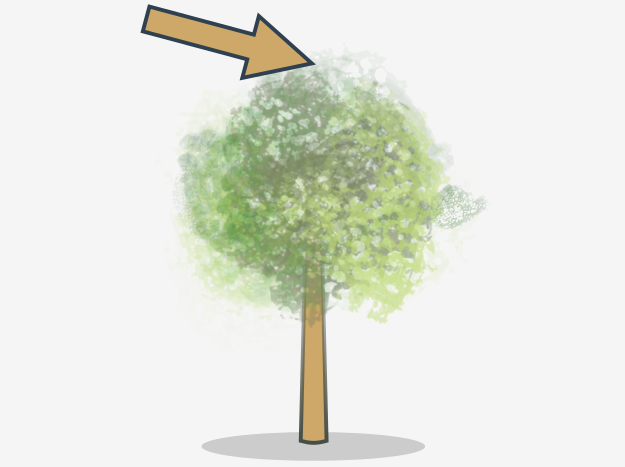

##XML parsing (part 2)
You already know how to access the root element. Let's use it to visit the elements of our tree - look at the code in the editor.

Result:

```
The root tag is: data
The root has the following children:
book {'title': 'The Little Prince'}
book {'title': 'Hamlet'}
```

The root element and all its children are `Element` objects. In the example above, we use the following properties:

**tag** – this returns the tag name as a string

**attrib** – this returns all attributes in the tag as a dictionary. To retrieve the value of a single attribute, use its key, e.g., child.attrib ['title'].

In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
print('The root tag is:', root.tag)
print('The root has the following children:')
for child in root:
    print(child.tag, child.attrib)


##XML parsing (part 3)
In addition to iterating over tree elements, we can access them directly using indexes. Take a look at the example below in which we use the current `book` element to retrieve text from its child elements. Look at the code in the editor.

Result:

```
My books:

Title:  The Little Prince
Author: Antoine de Saint-Exupéry
Year:  1943

Title:  Hamlet
Author: William Shakespeare
Year:  1603
```

During each iteration, we refer to the children of the book element by using indexes. Index `0` refers to the first child of the book element, while index `1` refers to its second child. Displaying text is possible thanks to the text property, available in the `Element` object.

**NOTE**: Indexes are also used in deeper nesting, e.g., `root [0] [0] .text` returns the first book element, and then displays the text placed in its first child.

In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
print("My books:\n")
for book in root:
    print('Title: ', book.attrib['title'])
    print('Author:', book[0].text)
    print('Year: ', book[1].text, '\n')


##XML parsing (part 4)
The `xml.etree.ElementTree` module, or more precisely, the `Element` class, provides several useful methods for finding elements in an XML document. Let's start with the method called `iter`.

The `iter` method returns all elements by having the tag passed as an argument. The element that calls it is treated as the main element from which the search starts. In order to find all matches, the iterator iterates recursively through all child elements and their nested elements.

Look at the code in the editor to see an example of a search for all items with the `author` tag.

Result:

```
Antoine de Saint-Exupéry
William Shakespeare
```


In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for author in root.iter('author'):
    print(author.text)


##XML parsing (part 5)
The `Element` object has a method called `findall` to search for direct child elements. Unlike the `iter` method, the `findall` method only searches the children at the first nesting level. Take a look at the example in the editor.

The example doesn't return any results, because the `findall` method can only iterate over the `book` elements that are the closest children of the root element. The correct code looks like this:


In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for book in root.findall('book'):
    print(book.get('title'))

Result:

```
The Little Prince
Hamlet
```

To display the value of the title attributes, we use the `get` method, which looks much better than a `book.attrib ['title']` call. Its use is very simple: just enter the name of the attribute and optionally (as a second argument) the value that will be returned if the attribute is not found (the default is `None`).

**NOTE**: The `findall` method also accepts an XPath expression. We encourage you to deepen your knowledge of XPath expressions and apply it to the example shown.

In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for author in root.findall('author'):
    print(author.text)


##XML parsing (part 6)
Another useful method used to parse an XML document is a method called `find`. The `find` method returns the first child element containing the specified tag or matching XPath expression. Look at the code in the editor.

Result:
```
The Little Prince
```

In the example, we use the find method to `find` the first child element containing the `book` tag, and then display the value of its title attribute. Note that the element from which we start the search is the root element.

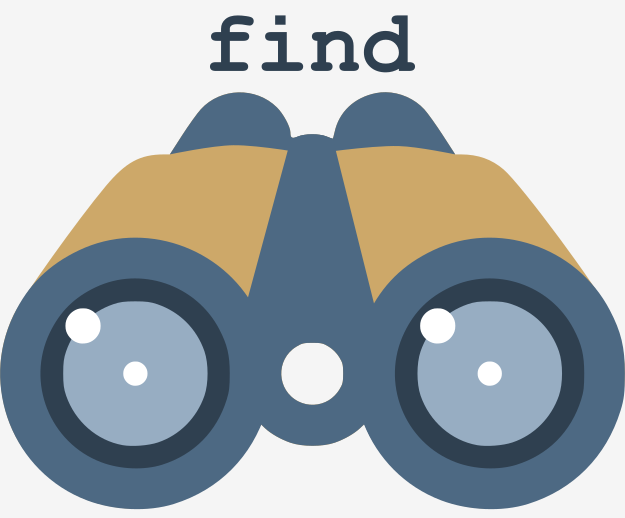

In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
print(root.find('book').get('title'))


#2.2 Lab - Weather forecast application
##Scenario
Have you seen the weather forecast for the coming week? It’ll be an extremely sunny and warm week. Familiarize yourself with the data in the `forecast.xml` file and then complete the following tasks:

1. Create a class named `TemperatureConverter` and its `convert_celsius_to_fahrenheit` method. The `convert_celsius_to_fahrenheit` method should convert the temperature from Celsius to Fahrenheit. Use the following formula:

**F = 9/5 * C + 32**.

2. Create a class named `ForecastXmlParser` and its `parse` method responsible for reading data from `forecast.xml`. Use the `TemperatureConverter` class to convert the temperature from Celsius to Fahrenheit (rounded to one decimal place). The `parse` method should print the following results:
```
Monday: 28 Celsius, 82.4 Fahrenheit
Tuesday: 27 Celsius, 80.6 Fahrenheit
Wednesday: 28 Celsius, 82.4 Fahrenheit
Thursday: 29 Celsius, 84.2 Fahrenheit
Friday: 29 Celsius, 84.2 Fahrenheit
Saturday: 32 Celsius, 89.6 Fahrenheit
Sunday: 33 Celsius, 91.4 Fahrenheit
```

**NOTE**: The *forecast.xml* file is available in your working directory at Edube Interactive. If you want to download the file and work with it locally, you can do it here: [forecast.xml](https://edube.org/files/download/856)

In [ ]:
import xml.etree.ElementTree as ET


class TemperatureConverter:
    def convert_celsius_to_fahrenheit(self, temperature_in_celsius):
        return 9.0/5.0 * temperature_in_celsius + 32


class ForecastXmlParser:
    def __init__(self, temperature_converter):
        self.temperature_converter = temperature_converter

    def parse(self, file):
        tree = ET.parse(file)
        root = tree.getroot()
        for child in root:
            day = child.find('day').text
            temperature_in_celsius = int(child.find(
                'temperature_in_celsius').text)
            temperature_in_fahrenheit = round(
                self.temperature_converter.convert_celsius_to_fahrenheit(
                    temperature_in_celsius), 1)
            print('{0}: {1} Celsius, {2} Fahrenheit'.format(
                day, temperature_in_celsius, temperature_in_fahrenheit))

temperature_converter = TemperatureConverter()
forecast_xml_parser = ForecastXmlParser(temperature_converter)
forecast_xml_parser.parse('forecast.xml')


#2.3 Modifying an XML document
##Modifying an XML document (part 1)
You've already learned how to parse an XML document. Time for the next step. Let's modify the element tree and create a new XML file based on it with the following movie data:
```
<?xml version="1.0"?>
<data>
    <movie title="The Little Prince" rate="5"></movie>
    <movie title="Hamlet" rate="5"></movie>
</data>
```

Are you wondering if it will be difficult to convert book data to movie data? Thanks to the `xml.etree.ElementTree` module, it's a piece of cake.


books > movies
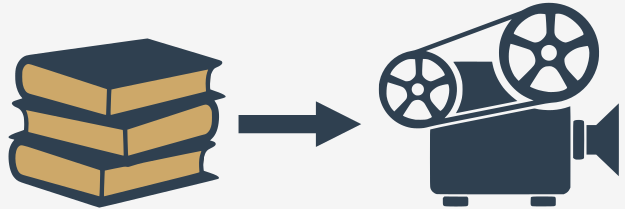

To change the tag of the `Element` object, we must assign a new value to its `tag` property. Look at the code in the editor.

Result:
```
movie {'title': 'The Little Prince'}
author : Antoine de Saint-Exupéry
year : 1943
movie {'title': 'Hamlet'}
author : William Shakespeare
year : 1603
```

In the example, during each iteration through the `book` elements, we replace them with the `movie` tag, and then make sure that all changes have gone through correctly.

In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for child in root:
    child.tag = 'movie'
    print(child.tag, child.attrib)
    for sub_child in child:
        print(sub_child.tag, ':', sub_child.text)


##Modifying an XML document (part 2)
Our XML has a few unnecessary elements, such as `author` and `year`. In order to remove them, we need to use the method called `remove`, provided by the `Element` class. Look at the code in the editor.

Result:
```
movie {'title': 'The Little Prince'}
movie {'title': 'Hamlet'}
```

The remove method removes the child element passed as its argument, which must be an `Element` object. Note that for this purpose we use the method called `find`, which you're already familiar with.

In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for child in root:
    child.tag = 'movie'
    child.remove(child.find('author'))
    child.remove(child.find('year'))
    print(child.tag, child.attrib)
    for sub_child in child:
        print(sub_child.tag, ':', sub_child.text)


##Modifying an XML document (part 3)
Do you remember the `get` method that gets the value of the attribute? The `Element` object also has a method called `set`, which allows you to set any attribute. Look at the code in the editor.

Result:
```
movie {'title': 'The Little Prince', 'rate': '5'}
movie {'title': 'Hamlet', 'rate': '5'}
```

The `set` method takes the attribute name and its value as arguments. In our case, we use it to set the highest rating for each of the movies.

In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for child in root:
    child.tag = 'movie'
    child.remove(child.find('author'))
    child.remove(child.find('year'))
    child.set('rate', '5')
    print(child.tag, child.attrib)
    for sub_child in child:
        print(sub_child.tag, ':', sub_child.text)


##Modifying an XML document (part 4)
You must have noticed that the modified XML document is not saved anywhere. To save all the changes we’ve made to the tree, we have to use the method called `write`.

The write method has only one required argument, which is a file name of the output XML file, or a file object opened for writing. In addition, we can define character encoding by using the second argument (the default is US-ASCII). To add a prolog to our document, we must pass `True` in the third argument.

Take a look at the example in the editor, in which we save the modified tree in a file called `movies.xml`.

The created file looks like this:
```
<?xml version='1.0' encoding='UTF-8'?>
<data><movie rate="5" title="The Little Prince" /><movie rate="5" title="Hamlet" /></data>
```

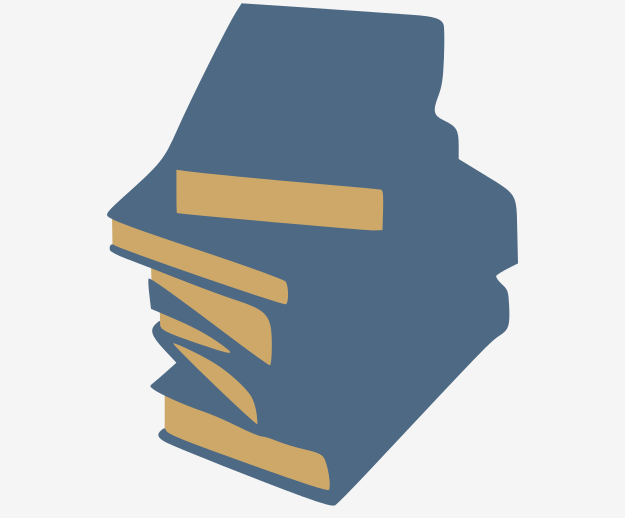

In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for child in root:
    child.tag = 'movie'
    child.remove(child.find('author'))
    child.remove(child.find('year'))
    child.set('rate', '5')
    print(child.tag, child.attrib)
    for sub_child in child:
        print(sub_child.tag, ':', sub_child.text)

tree.write('movies.xml', 'UTF-8', True)


##Building an XML document (part 1)
During this course, you haven’t had the opportunity to create an `Element` object yourself. Let's see how to build an XML document in Python.

The `Element` class constructor takes two arguments. The first is the name of the tag to be created, while the second (optional) is the attribute dictionary. In the example in the editor, we've created the root element represented by a `data` tag with no attributes - look at the code.

Result:
```
<data />
```

In the example above, we use the `dump` method, which allows us to debug either the whole tree or a single element.



In [ ]:
import xml.etree.ElementTree as ET

root = ET.Element('data')
ET.dump(root)


##Building an XML document (part 2)
In addition to the `Element` class, the `xml.etree.ElementTree` module offers a function for creating child elements called `SubElement`. The `SubElement` function takes three arguments.

The first one defines the parent element, the second one defines the tag name, and the third (optional) defines the attributes of the element. Let's see how it looks in action and analyze the code in the editor.

Result:
```
<data><movie rate="5" title="The Little Prince" /><movie rate="5" title="Hamlet" /></data>
```

In the example, we've added two child elements called `movie` to the root element. The created elements are objects of the `Element` class, so we can use all of the methods that we learned about during this course.

NOTE: To save a document using the `write` method, we need to have an `ElementTree` object. To do this, pass our root element to its constructor:
```
tree = ET.ElementTree(root)
```

In [ ]:
import xml.etree.ElementTree as ET

root = ET.Element('data')
movie_1 = ET.SubElement(root, 'movie', {'title': 'The Little Prince', 'rate': '5'})
movie_2 = ET.SubElement(root, 'movie', {'title': 'Hamlet', 'rate': '5'})
ET.dump(root)


#2.4 Lab - Vegan products list
##Scenario
You are a programmer working for an online store. Your task is to build an XML document containing information about the three vegan products available in the store:

```
<?xml version="1.0"?>
<shop>
    <category name="Vegan Products">
        <product name="Good Morning Sunshine">
            <type>cereals</type>
            <producer>OpenEDG Testing Service</producer>
            <price>9.90</price>
            <currency>USD</currency>
        </product>
        <product name="Spaghetti Veganietto">
            <type>pasta</type>
            <producer>Programmers Eat Pasta</producer>
            <price>15.49</price>
            <currency>EUR</currency>
        </product>
        <product name="Fantastic Almond Milk">
            <type>beverages</type>
            <producer>Drinks4Coders Inc.</producer>
            <price>19.75</price>
            <currency>USD</currency>
        </product>
    </category>
</shop>
```

Save the document to the `shop.xml` file. Use UTF-8 character encoding and don't forget to add the prolog to the beginning of the file. Good luck!

In [ ]:
import xml.etree.ElementTree as ET

class XmlTreeHelper:
    def add_tags_with_text(self, parent, tags):
        elements = []
        for tag in tags:
            element = ET.SubElement(parent, tag)
            element.text = tags[tag]
            elements.append(element)
        return elements

root = ET.Element('shop')

category = ET.SubElement(root, 'category', {'name': 'Vegan Products'})

product_1 = ET.SubElement(category, 'product', {'name': 'Good Morning Sunshine'})
product_2 = ET.SubElement(category, 'product', {'name': 'Spaghetti Veganietto'})
product_3 = ET.SubElement(category, 'product', {'name': 'Fantastic Almond Milk'})

xml_tree_helper = XmlTreeHelper()

xml_tree_helper.add_tags_with_text(product_1, {
    'type': 'cereals',
    'producer': 'OpenEDG Foods Limited',
    'price': '9.90',
    'currency': 'USD'
})

xml_tree_helper.add_tags_with_text(product_2, {
    'type': 'pasta',
    'producer': 'Programmers Eat Pasta Gmbh',
    'price': '14.49',
    'currency': 'EUR'
})

xml_tree_helper.add_tags_with_text(product_3, {
    'type': 'beverages',
    'producer': 'Drinks4Coders Inc.',
    'price': '19.75',
    'currency': 'USD'
})

# ET.dump(root)

tree = ET.ElementTree(root)
tree.write('shop.xml', 'UTF-8', True)


#3.3 The CSV module in Python
The CSV module in Python
The CSV (Comma Separated Values) format is one of the most popular file formats used to store and transfer data between different programs. Currently, many database management tools and the popular Excel offer data import and export in this format.

The CSV file is a plain text file with the .csv extension. A typical file contains comma-separated values, but other separators such as semicolon or tab are also allowed. It should be emphasized that only one type of separator can be used in one CSV file.

Each line in the file represents a certain set of data. Optionally, in the first line we can put a header that describes this data. Let's look at a simple example of a file called `contacts.csv` that stores contacts from a phone:
```
Name,Phone
mother,222-555-101
father,222-555-102
wife,222-555-103
mother-in-law,222-555-104
```

In the above file, there are four contacts consisting of name and phone number. Note that the first line contains a header to help you interpret the data.

Download the file: [contacts.csv](https://edube.org/uploads/media/default/0001/01/98a45694ea3dd74d1047140aed7a160a56dbed07.zip)

During this course, you'll learn how to use the `csv` module provided by the Python Standard Library. However, for commercial projects, we recommend using an excellent library called `pandas`. We encourage you to familiarize yourself with its possibilities in your free time.

The CSV format is really simple. Let's find out whether reading data from a CSV file in Python is equally simple.

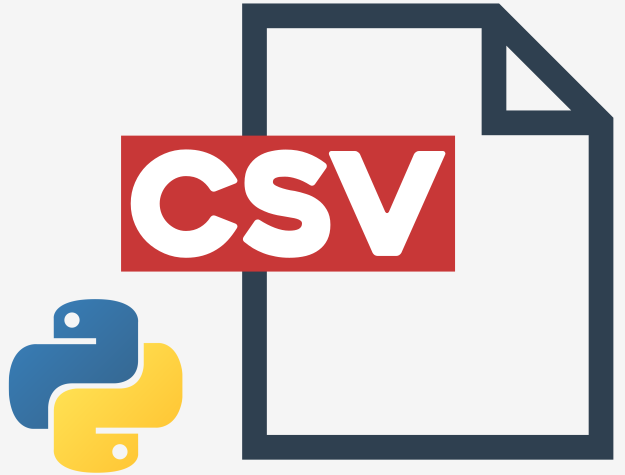

##Reading data from a CSV file (part 1)
The Python Standard Library offers a module called `csv` that provides functions for reading and writing data in CSV format. Reading data is done using the reader object, while writing is done using the writer object. First, we'll take a closer look at reading data using the reader object.

The `reader` function returns an object that allows you to iterate over each line in the CSV file. To create it, we need to pass a file object to the `reader` function. For this purpose, we can use a built-in function called `open`. Look at the code in the editor and run it.

It should produce the following output:
```
['Name', 'Phone']
['mother', '222-555-101']
['father', '222-555-102']
['wife', '222-555-103']
['mother-in-law', '222-555-104']
```

What happened? We've passed an open file named `contacts.csv` and a separator used to separate the data in the file to the `reader` function. The second argument can be omitted if our file uses the default separator, which is a comma - we've added it to show you how to specify other separators.

In [ ]:
import csv

with open('contacts.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        print(row)

##Reading data from a CSV file (part 2)
Finally, we read each row using the `for` loop. Note that a single line is returned as a list of strings. However, more readable results can be obtained, e.g., by using the `join` method. Look at the code in the editor and run it.

It should produce the following result:
```
Name,Phone
mother,222-555-101
father,222-555-102
wife,222-555-103
mother-in-law,222-555-104
```
**NOTE**: The `newline=''` argument added to the `open` function protects us from incorrect interpretation of the newline character on different platforms.



In [ ]:
import csv

with open('contacts.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        print(','.join(row))

##Reading data from a CSV file (part 3)
The `csv` module provides a more convenient way to read data, in which each line is mapped to an `OrderedDict` object. To achieve this, we must use the `DictReader` class in the way we show in the editor.

The code in the editor will produce the following output:
```
mother : 222-555-101
father : 222-555-102
wife : 222-555-103
mother-in-law : 222-555-104
```

In [ ]:
import csv

with open('contacts.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row['Name'], ':', row['Phone'])

##Reading data from a CSV file (part 4)
Like the `reader` function, the `DictReader` class accepts a file object as an argument. It treats the first line of the file as a header from which to read the keys. If your file doesn't have a header, you must define it using the `fieldnames` argument. Look at the code in the editor.

NOTE: If you define more column names than the values in the file, the missing values will be `None`.

In [ ]:
import csv

with open('contacts.csv', newline='') as csvfile:
    fieldnames = ['Name', 'Phone']
    reader = csv.DictReader(csvfile, fieldnames=fieldnames)
    for row in reader:
        print(row['Name'], row['Phone'])

#3.2 Lab - Contactt advanced
##Scenario
When we buy a new phone, it's necessary to import old contacts. Why not import them from a CSV file? Look again at the familiar `contacts.csv` file, and then design your new phone as follows:

1. create a class called `PhoneContact` representing a single contact. The `PhoneContact` class should contain the name and phone properties;
2. create a class called `Phone` that will store your contacts. First, implement the method called `load_contacts_from_csv`, responsible for reading data from the CSV file into the class property called `contacts`. The `contacts` property should contain a list of `PhoneContact` objects;
3. add to the `Phone` class a method called `search_contacts`, which accepts any phrase entered by the user from the keyboard, and then based on it perform a search for all matching contacts (case insensitive). If there are no results, print the message: "No contacts found".

Example input:
```
Search contacts: mother
```
Example output:
```
mother (222-555-101)
mother-in-law (222-555-104)
```
Example input:
```
Search contacts: 103
```
Example output:
```
wife (222-555-103)
```

**NOTE**: The *contacts.csv* file is available in your working directory in Edube Interactive. If you want to download the file and work with with it locally. https://edube.org/files/download/857

In [ ]:
import csv


class PhoneContact:
    def __init__(self, name, phone):
        self.name = name
        self.phone = phone


class Phone:
    def __init__(self):
        self.contacts = []

    def load_contacts_from_csv(self, file):
        with open(file, newline='') as csvfile:
            fieldnames = ['Name', 'Phone']
            reader = csv.DictReader(csvfile, fieldnames)
            for row in reader:
                self.contacts.append(PhoneContact(row['Name'], row['Phone']))

    def search_contacts(self, phrase):
        count = 0
        for contact in self.contacts:
            if phrase.lower() in contact.name.lower() \
			or phrase in contact.phone:
                print('{0} ({1})'.format(contact.name, contact.phone))
                count += 1
        if count == 0:
            print("No contacts found")

phone = Phone()
phone.load_contacts_from_csv('contacts.csv')
phrase = input("Search contacts: ")
phone.search_contacts(phrase)


#3.3 Saving data to a CSV file
##Saving data to a CSV file (part 1)
As we mentioned before, saving data to a CSV file is done using the `writer` object provided by the `csv` module. To create it, we need to use a function called `writer`, which takes the same set of arguments as the `reader` function. Let's see how to save contacts to a CSV file. Look at the code in the editor.

In the example code, we first open the file for writing. The `'w'` mode creates a file for us if it hasn't already been created. Next, we create a `writer` object that we use to add rows using the `writerow` method. The `writerow` method takes a list of values as an argument, and then saves them as one line in a CSV file.

In [ ]:
import csv

with open('exported_contacts.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')

    writer.writerow(['Name', 'Phone'])
    writer.writerow(['mother', '222-555-101'])
    writer.writerow(['father', '222-555-102'])
    writer.writerow(['wife', '222-555-103'])
    writer.writerow(['mother-in-law', '222-555-104'])

##Saving data to a CSV file (part 2)
Imagine a situation where you add a contact containing the separator used to separate the values in the CSV file. By default, these values are quoted, but you can change this with the `quotechar` argument, which must be a single character. Look at the code in the editor and notice how we explicitly set default arguments.

The code will save the following data to the exported_contacts.csv file:
```
Name,Phone
mother,222-555-101
father,222-555-102
wife,222-555-103
"grandmother, grandfather and auntie",222-555-105
```
The last argument called `quoting`, specifies what values should be quoted. The default value `QUOTE_MINIMAL` means that only values with special characters such as separator or `quotechar` will be quoted. In our case, it's the value of "grandmother, grandfather and auntie".

Below are other constants that we can use as the value of the `quoting` argument:

**csv.QUOTE_ALL**– quotes all values

**csv.QUOTE_NONNUMERIC** – quotes only non-numeric values

**csv.QUOTE_NONE** – doesn't quote any values. It's not a good idea to set this value if you have special characters that require quoting, because this will raise an error

**NOTE**: The `quotechar` and `quoting` parameters can also be used in the `reader` function. See the documentation for more information.

In [ ]:
import csv

with open('exported_contacts.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    writer.writerow(['Name', 'Phone'])
    writer.writerow(['mother', '222-555-101'])
    writer.writerow(['father', '222-555-102'])
    writer.writerow(['wife', '222-555-103'])
    writer.writerow(['mother-in-law', '222-555-104'])
    writer.writerow(['grandmother, grandfather', '222-555-105'])

##Saving data to a CSV file (part 3)
Do you remember how we read rows from the CSV file to `OrderedDict` objects? In the `csv` module, there is an analogous class called `DictWriter` with which we can map dictionaries to rows. Unlike the `DictReader` object, when creating the `DictWriter` object, we must define a header. Let's look at the example in the editor.

To create the `DictWriter` object, we use a file object and a list containing column names. Note that before saving the value, we first call the `writeheader` method, which adds the header to the first line of the file. After that we add rows with values by passing dictionaries to the `writerow` method.

In [ ]:
import csv

with open('exported_contacts.csv', 'w', newline='') as csvfile:
    fieldnames = ['Name', 'Phone']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'Name': 'mother', 'Phone': '222-555-101'})
    writer.writerow({'Name': 'father', 'Phone': '222-555-102'})
    writer.writerow({'Name': 'wife', 'Phone': '222-555-103'})
    writer.writerow({'Name': 'mother-in-law', 'Phone': '222-555-104'})
    writer.writerow({'Name': 'grandmother, grandfather and auntie', 'Phone': '222-555-105'})

#3.4 Lab - Exam Report
##Scenario
Have you ever prepared a report? Your task will be to prepare a report summarizing the results of exams in maths, physics and biology. The report should include the name of the exam, the number of candidates, the number of passed exams, the number of failed exams, and the best and the worst scores. All the data necessary to create the report is in the `exam_results.csv` file.

Note that one candidate may have several results for the same exam. The number of candidates should express the number of unique people in each exam identified by `Candidate ID`. The final report should look like this:

```
Exam Name,Number of Candidates,Number of Passed Exams,Number of Failed Exams,Best Score,Worst Score
Maths,8,4,6,90,33
Physics,3,0,3,66,50
Biology,5,2,3,88,23
```

NOTE: The `exam_results.cs` file is available in your working directory in Edube Interactive. If you want to download the file and work with it locally, you can do it here: [exam_results.csv](https://edube.org/files/download/858)

In [ ]:
import csv


class ExamData:
    def __init__(self, exam_name):
        self.exam_name = exam_name
        self.candidates = []
        self.number_of_passed_exams = 0
        self.number_of_failed_exams = 0
        self.best_score = 0
        self.worst_score = 100

    def get_number_of_cadidates(self):
        return len(set(self.candidates))


class ExamResultReader:
    def __init__(self, filename):
        self.filename = filename
        self.data = {}

    def prepare_data(self):
        with open(self.filename, newline='') as csvfile:
            fieldnames = ['Exam Name', 'Candidate ID', 'Score', 'Grade']
            reader = csv.DictReader(csvfile, fieldnames=fieldnames)
            row_count = 0
            for row in reader:
                row_count += 1
                if row_count == 1:
                    continue
                exam_data = self.get_exam_data(row['Exam Name'])
                exam_data.candidates.append(row['Candidate ID'])
                if row['Grade'] == 'Pass':
                    exam_data.number_of_passed_exams += 1
                else:
                    exam_data.number_of_failed_exams += 1
                exam_data.best_score = max(
                    exam_data.best_score,
                    int(row['Score'])
                )
                exam_data.worst_score = min(
                    exam_data.worst_score,
                    int(row['Score'])
                )
        return self.data

    def get_exam_data(self, exam_name):
        if exam_name not in self.data:
            exam_data = ExamData(exam_name)
            self.data[exam_name] = exam_data
        return self.data[exam_name]


class ExamReport:
    def __init__(self, data):
        self.data = data

    def generate(self, filename):
        with open(filename, 'w', newline='') as csvfile:
            fieldnames = [
                'Exam Name',
                'Number of Candidates',
                'Number of Passed Exams',
                'Number of Failed Exams',
                'Best Score',
                'Worst Score'
            ]
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            for key, exam_data in self.data.items():
                number_of_cadidates = exam_data.get_number_of_cadidates()
                writer.writerow({
                    'Exam Name': exam_data.exam_name,
                    'Number of Candidates': number_of_cadidates,
                    'Number of Passed Exams': exam_data.number_of_passed_exams,
                    'Number of Failed Exams': exam_data.number_of_failed_exams,
                    'Best Score': exam_data.best_score,
                    'Worst Score': exam_data.worst_score
                })

exam_result_reader = ExamResultReader('exam_results.csv')
data = exam_result_reader.prepare_data()
exam_report = ExamReport(data)
exam_report.generate('exam_report.csv')


#4.1 Logging in Python
Logging in Python
The Python Standard Library provides a useful module called `logging` to log events occurring in the application. Logs are most often used to find the cause of an error. By default, Python and its modules provide many logs informing you of the causes of errors. However, it's good practice to create your own logs that may be useful to you or other programmers.

An example of using your own logs can be any Internet system. When users visit your site, you can log information about the browsers they use. If something goes wrong, you'll be able to determine in which browsers the problem is occurring.



In Python, you can store logs in different places. Most often it's in the form of a file, but it can also be an output stream, or even an external service. To start logging, we need to import the appropriate module:


In [ ]:
import logging

In this part of the course, you'll learn how to create logs using the logging module. See what this module offers and start using it to become a better programmer.

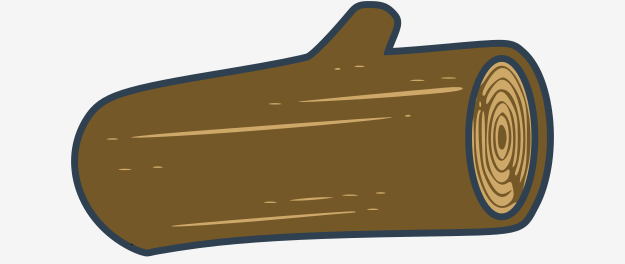

##The *Logger* object
One application may have several loggers created both by us and by programmers of the modules. If your application is simple, as in the example below, you can use the root logger. To do this, call the `getLogger` function without providing a name. The root logger is at the highest point in the hierarchy. Its place in the hierarchy is assigned based on the names passed to the getLogger function.

Logger names are similar to the names of the Python modules in which the dot separator is used. Their format is as follows:

**hello** – creates a logger which is a child of the root logger;

**hello.world** – creates a logger which is a child of the `hello` logger.

If you want to make another nesting, just use the dot separator.

The `getLogger` function returns a `Logger` object. Let's look at the example code in the editor. We'll find there the ways to get the `Logger` object, both with and without a name.

We recommend calling the `getLogger` function with the `__name__` argument, which is replaced by the current module name. This allows you to easily specify the source of the logged message.

**NOTE**: Several calls to the `getLogger` function with the same name will always return the same object.

In [ ]:
import logging

logger = logging.getLogger()
hello_logger = logging.getLogger('hello')
hello_world_logger = logging.getLogger('hello.world')
recommended_logger = logging.getLogger(__name__)

##Logging levels
The `Logger` object allows you to create logs with different levels of logging that help you to distinguish between less important logs and those reporting a serious error. By default, the following logging levels are defined:

|**Level name**|**Value**|
|:-|:-|
|`CRITICAL`|`50`|
|`ERROR`|`40`|
|`WARNING`|`30`|
|`INFO`|`20`|
|`DEBUG`|`10`|
|`NOTSET`|`0`|

Each level has a name and a numeric value. You can also define your own level, but those offered by the `logging` module are quite sufficient. The `Logger` object has methods that set the logging level for you. Take a look at the example in the editor.

Result:
```
CRITICAL:root:Your CRITICAL message
ERROR:root:Your ERROR message
WARNING:root:Your WARNING message
```

All of the above methods require you to provide a message that will be visible in the logs. The default log format includes the level, the logger name and the message you’ve defined. Note that all these values are separated by a colon. Later in this course, you'll learn how to change the default formatting.

You’re probably wondering why messages with `INFO` and `DEBUG` levels are not displayed. This is due to the default configuration, which we'll talk about in a moment.

**NOTE**: The `basicConfig `method will be discussed later in the course. For now, remember that it's responsible for the basic logging configuration.



In [ ]:
import logging

logging.basicConfig()

logger = logging.getLogger()

logger.critical('Your CRITICAL message')
logger.error('Your ERROR message')
logger.warning('Your WARNING message')
logger.info('Your INFO message')
logger.debug('Your DEBUG message')

##The *setLevel* method
The root logger has the logging level set to `WARNING`. This means that messages at the `INFO` or `DEBUG` levels aren't processed.

Sometimes you may want to change this behavior, especially if you create your own logger. To do this, you need to pass a logging level to the `setLevel` method. See how we do this in the editor.

Result:
```
CRITICAL:root:Your CRITICAL message
ERROR:root:Your ERROR message
WARNING:root:Your WARNING message
INFO:root:Your INFO message
DEBUG:root:Your DEBUG message
```

Setting the `DEBUG` level causes messages with this or a higher level to be logged. It's worth mentioning that loggers created using the name argument have the `NOTSET` level set by default. In this case, their logging level is set based on the parent levels, starting from the closest parent to the root logger.

If the closest parent has a level set to `NOTSET`, the logger level is set based on the levels of subsequent parents in the hierarchy. Level setting ends if a parent has a level other than`NOTSET`. If none of the visited parents has a level other than `NOTSET`, then all messages will be processed regardless of their level.



In [ ]:
import logging

logging.basicConfig()

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

logger.critical('Your CRITICAL message')
logger.error('Your ERROR message')
logger.warning('Your WARNING message')
logger.info('Your INFO message')
logger.debug('Your DEBUG message')

##Basic configuration (part 1)
As we mentioned before, the basic logging configuration is done using the `basicConfig` method. Calling the `basicConfig` method (without specifying any arguments) creates a StreamHandler object that processes the logs and then displays them in the console.

The `StreamHandler` object is created by the default `Formatter` object responsible for the log format. As a reminder, the default format consists of the level name, logger name, and defined message. Finally the newly created handler is added to the root logger. Later you'll learn how to create your own handler and formatter.

In the previous examples, we called the `basicConfig` method without any arguments. Using the `basicConfig`, method you can change the logging level (in the same way as using the `setLevel` method) and even the location of the logs. Take a look at the example in the editor.

Result in `prod.log` file:
```
CRITICAL:root:Your CRITICAL message
```
In the example, the `basicConfig` method takes three arguments. The first one is the logging level equal to `CRITICAL`, which means that only messages with this level will be processed.

Passing a filename to the second argument creates a `FileHandler` object (instead of a `StreamHandler` object). As you’ve probably noticed, the logs no longer appear in the console. After setting the `filename` argument, all logs will be directed to the specified file.

In addition, passing the last `filemode` argument with the value `'a'` (this is the default mode) means that new logs will be appended to this file. If you'd like to change this mode, you can use other modes that are analogous to those used in the built-in `open` function.

These aren't all the arguments that the basicConfig method can take. Are you ready for another dose of knowledge? Let's move on!

**NOTE**: `ThebasicConfig` method changes the configuration of the root logger and its children who don't have their own handler defined.

In [ ]:
import logging

logging.basicConfig(level=logging.CRITICAL, filename='prod.log', filemode='a')

logger = logging.getLogger()

logger.critical('Your CRITICAL message')
logger.error('Your ERROR message')
logger.warning('Your WARNING message')
logger.info('Your INFO message')
logger.debug('Your DEBUG message')

##Basic configuration (part 2)
The `basicConfig` method presented earlier can also be used to change the default log formatting. This is done using the `format` argument, which can be defined using any characters or attributes of the `LogRecord` object. Let's explain it with the example in the editor.

Result in the `prod.log` file:
```
root:CRITICAL:2019-10-10 17:16:46,293:Your CRITICAL message
```
The format we define is created by combining the attributes of the `LogRecord` object separated by a colon. The `LogRecord` object is automatically created by the logger during logging. It contains many attributes, such as the name of the logger, the logging level, or even the line number in which the logging method is called. A full list of all available attributes can be found here [https://docs.python.org/3/library/logging.html#logrecord-attributes].

In our example, we use the following attributes:

**%(name)s** – this pattern will be replaced by the name of the logger that calls the logging method. In our case, it's the root logger;

**%(levelname)s** – this pattern will be replaced with the set login level. In our case, this is the `CRITICAL` level;

**%(asctime)s** – this pattern will be replaced with a human-readable date format that indicates when the `LogRecord` object was created. The decimal value is expressed in milliseconds;

**%(message)s** – this pattern will be replaced by the defined message. In our case, it's `'Your CRITICAL message'`.

In general, the scheme for using the `LogRecord` object argument in the `format` argument looks like this:
```
(LOG_RECORD_ATTRIBUTE_NAME)s
```

In [ ]:
import logging

FORMAT = '%(name)s:%(levelname)s:%(asctime)s:%(message)s'

logging.basicConfig(level=logging.CRITICAL, filename='prod.log', filemode='a', format=FORMAT)

logger = logging.getLogger()

logger.critical('Your CRITICAL message')
logger.error('Your ERROR message')
logger.warning('Your WARNING message')
logger.info('Your INFO message')
logger.debug('Your DEBUG message')

##Your first handler
Each logger can save logs in different locations as well as in different formats. To do this, you must define your own handler and formatter.

In most cases, you'll want to save your logs to a file. The logging module has the `FileHandler` class, which facilitates this task. When creating a `FileHandler object`, you must pass a filename where the logs will be saved.

Additionally, you can pass a file `mode` with the mode argument, e.g., `mode='a'`. In the next step, you should set the logging level that will be processed by the handler. By default, the newly created handler is set to the `NOTSET` level. You can change this using the setLevel method. In the example in the editor, we've set the `CRITICAL` level.

Finally, you need to add the created handler to your logger using the `addHandler` method.

Result in the `prod.log` file:
```
Your CRITICAL message
```
If you check the `prod.log` file, you'll see that only the message is saved there. Do you know what we forgot? Your handler hasn't created a formatter. You'll learn how to do this in a moment.

**NOTE**: Each logger can have several handlers added. One handler can save logs to a file, while another can send them to an external service. In order to process messages with a level lower than `WARNING` by added handlers, it's necessary to set this level threshold in the root logger.

In [ ]:
import logging

logger = logging.getLogger(__name__)

handler = logging.FileHandler('prod.log', mode='w')
handler.setLevel(logging.CRITICAL)

logger.addHandler(handler)

logger.critical('Your CRITICAL message')
logger.error('Your ERROR message')
logger.warning('Your WARNING message')
logger.info('Your INFO message')
logger.debug('Your DEBUG message')

##Your first formatter
Congratulations! You’ve just created your first handler. Only the formatter is missing, but don't worry. It's just two steps. Take a look at the example in the editor.

Result in the `prod.log` file:
```
__main__:CRITICAL:2019-10-10 20:40:05,119:Your CRITICAL message
```
In the first step you need to create a `Formatter` object by passing the format you've defined to its constructor. In the example, we use the format defined in one of the previous examples.

The next step is to set the formatter in the handler object. This is done using the `setFormatter` method. After doing this, you can analyze your logs in the `prod.log file`.


In [ ]:
import logging

FORMAT = '%(name)s:%(levelname)s:%(asctime)s:%(message)s'

logger = logging.getLogger(__name__)

handler = logging.FileHandler('prod.log', mode='w')
handler.setLevel(logging.CRITICAL)

formatter = logging.Formatter(FORMAT)
handler.setFormatter(formatter)

logger.addHandler(handler)

logger.critical('Your CRITICAL message')
logger.error('Your ERROR message')
logger.warning('Your WARNING message')
logger.info('Your INFO message')
logger.debug('Your DEBUG message')

#4.2 Lab - Battery Temperature recording application
##Scenario
It's likely that the temperature of your phone battery can get pretty high. Check if that’s true. Write a program that will simulate the recording of battery temperatures with an interval of one minute. The simulation should contain 60 logs (the last hour).

To simulate temperatures, use one of the available random functions in Python. Temperatures should be drawn in the range of 20–40 degrees Celsius, and then saved in the following format:
```
LEVEL_NAME – TEMPERATURE_IN_CELSIUS UNIT => DEBUG – 20 C
```
The drawn temperatures should be assigned to the appropriate level depending on their value:
```
DEBUG = TEMPERATURE_IN_CELSIUS < 20
WARNING = TEMPERATURE_IN_CELSIUS >= 30 AND TEMPERATURE_IN_CELSIUS <= 35
CRITICAL = TEMPERATURE_IN_CELSIUS > 35
```
Put all logs in the battery_temperature.log file. The task will be completed when you implement your own handler and formatter.

In [ ]:
import logging
import random

FORMAT = '%(levelname)s - %(message)s'


class BatterySimulation:
    def __init__(self, logger):
        self.logger = logger

    def simulate_last_hour(self):
        for minute in range(1, 60 + 1):
            temperature = random.randint(20, 40)

            if temperature < 30:
                self.logger.debug('{0} C'.format(temperature))
            elif temperature >= 30 and temperature <= 35:
                self.logger.warning('{0} C'.format(temperature))
            elif temperature > 35:
                self.logger.critical('{0} C'.format(temperature))
            else:
                raise Exception('Temperature out of range.')

logger = logging.getLogger('battery.temperature')
logger.setLevel(logging.DEBUG)

handler = logging.FileHandler('battery_temperature.log', mode='w')
handler.setLevel(logging.DEBUG)

formatter = logging.Formatter(FORMAT)
handler.setFormatter(formatter)

logger.addHandler(handler)

battery_simulation = BatterySimulation(logger)
battery_simulation.simulate_last_hour()


#5.1 The configparser module
##Introduction to the *configparser* module
Currently, many popular services provide an API that we can use in our applications. Integration with these services requires authentication using data such as a login and password, or simply an access token.

Each service may require different data for authentication, but one thing is certain – we need to store it somewhere in our application. It's not a good idea to hardcode them directly in the code.

A better solution is to use the configuration file, which will be read by the code. In Python, this is possible thanks to a module called `configparser`.

The `configparser` module is available in the Python standard library. To start using it, we need to import the appropriate module:

In [ ]:
import configparser

However, before we start reading the configuration data, we must familiarize ourselves with the structure of the file in which they're stored. Are you curious how this is done?

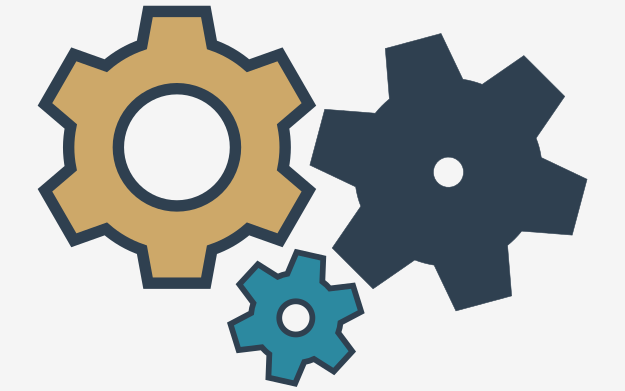

##What does the configuration file look like?
The structure of the configuration file is very similar to Microsoft Windows INI files. It consists of sections that are identified by names enclosed in square brackets. The sections contain items consisting of key value pairs. Each pair is separated by a colon `:` or equals sign `=`.

What's more, the configuration file may contain comments followed by a semicolon `;` or hash `#`:
```
[DEFAULT]
host = localhost # This is a comment.

[mariadb]
name = hello
user = user
password = password

[redis]
port = 6379
db = 0

```

Our configuration file contains the `DEFAULT`, `mariadb` and `redis` sections.

The `DEFAULT` section is slightly different because it contains the default values that can be read in the other sections of the file. In our case, there's a common host for all sections.

The second section called `mariadb` stores the data necessary to connect to the MariaDB database. These are the database name, username, and password.

The last section contains Redis configuration data, consisting of the port and database number. In addition, both in this section and in the `mariadb` section, we have access to the `host` option defined in the `DEFAULT` section. In a moment, you'll learn how to read this data using the configparser module.

**NOTE**: The whitespace at the beginning and end of keys and values is removed.

##Parsing the configuration file
Parsing the configuration file is extremely simple. First, we need to create a `ConfigParser` object, which provides many useful methods for parsing data. One of them is the `read` method, responsible for reading and parsing the configuration file. In our example, we pass the `config.ini` filename to it, but it's also possible to pass a list containing several files.

If all goes well, the`read` method returns a list of filenames that have been successfully parsed. Let's look at the code in the editor to see how to parse the data stored in the `config.ini` file.

Result:
```
Sections: ['mariadb', 'redis']

mariadb section:
Host: localhost
Database: hello
Username: user
Password: password

redis section:
Host: localhost
Port: 6379
Database number: 0
```
In the example, we use the `sections` method to display the names of sections in the file. Note that the `DEFAULT` section doesn't appear in the list of returned sections. This is the default behavior of the `sections` method.

Access to the data contained in the configuration file is analogous to how we use dictionaries. To obtain any value, use the appropriate key sequence. It's important to note that the section names are case sensitive, while the keys aren't.

Despite the fact that the `DEFAULT` section is omitted as a result of the `sections` method, we still have access to its options. Both the `mariadb` and `redis` sections can read the `host` option.

Its also possible to access the values stored in the options by using the `get` method. The `get` method requires the section name and key to be passed. This is what it looks like in practice:
```
print('Host:', config.get('mariadb', 'host')) # print('Host:', config['mariadb']['host'])
```


In [ ]:
import configparser

config = configparser.ConfigParser()
print(config.read('config.ini'))

print('Sections:', config.sections(),'\n')

print('mariadb section:')
print('Host:', config['mariadb']['host'])
print('Database:', config['mariadb']['name'])
print('Username:', config['mariadb']['user'])
print('Password:', config['mariadb']['password'], '\n')

print('redis section:')
print('Host:', config['redis']['host'])
print('Port:', int(config['redis']['port']))
print('Database number:', int(config['redis']['db']))

##Reading configuration from other sources
The `configparser` module enables configurations from various sources to be read. One of them is a dictionary that we can load using the `read_dict`. Look at the code in the editor.

Result:
```
Sections: ['mariadb', 'redis']

mariadb section:
Host: localhost
Database: hello
Username: root
Password: password

redis section:
Host: localhost
Port: 6379
Database number: 0
```
The `read_dict` method accepts any dictionary whose keys are section names, while the values include dictionaries containing keys and values. All values read from the dictionary are converted to strings.

**NOTE**: The `configparser` module also has `read_file` and `read_string` methods that allow you to read the configuration from an open file or string. You can find more information about these methods in the documentation.

In [ ]:
import configparser

config = configparser.ConfigParser()

dict = {
    'DEFAULT': {
        'host': 'localhost'
    },
    'mariadb': {
        'name': 'hello',
        'user': 'root',
        'password': 'password'
    },
    'redis': {
        'port': 6379,
        'db': 0
    }
}

config.read_dict(dict)

print('Sections:', config.sections(),'\n')

print('mariadb section:')
print('Host:', config['mariadb']['host'])
print('Database:', config['mariadb']['name'])
print('Username:', config['mariadb']['user'])
print('Password:', config['mariadb']['password'], '\n')

print('redis section:')
print('Host:', config['redis']['host'])
print('Port:', int(config['redis']['port']))
print('Database number:', int(config['redis']['db']))


##Creating a configuration file
Creating a configuration file is as easy as parsing it. If you know how to work with dictionaries, it's a piece of cake. Let's look at a simple example of how to create a configuration file that you already know. Take a look at the code in the editor.

To create a configuration file, you should treat the `ConfigParser` object as a dictionary. Note that the section names are keys, while their options are listed in separate dictionaries. The above configuration is saved using the `write` method, which requires an open file to be passed in text mode. For this purpose, the built-in open method is used.

A configuration loaded using the `read` method can also be modified. To change a single option, simply set the new value to the appropriate key, and then save the file using the `write` method:

In [ ]:
import configparser

config = configparser.ConfigParser()
config.read('config.ini')

config['redis']['db'] = '1'

with open('config.ini', 'w') as configfile:
    config.write(configfile)


In [ ]:
import configparser

config = configparser.ConfigParser()

config['DEFAULT'] = {'host': 'localhost'}
config['mariadb'] = {'name': 'hello',
                     'user': 'root',
                     'password': 'password'}
config['redis'] = {'port': 6379,
                   'db': 0}

with open('config.ini', 'w') as configfile:
    config.write(configfile)

##Interpolating values
The big advantage of the configuration file is the possibility of using interpolation. It allows you to create expressions consisting of a placeholder under which the appropriate value will be substituted. Take a look at the configuration file below:
```
[DEFAULT]
host = localhost

[mariadb]
name = hello
user = user
password = password

[redis]
port = 6379
db = 0
dsn = redis://%(host)s
```


The configuration file has been extended with another option called `dsn`. Its value contains the placeholder `%(host)s`, which needs to be replaced by an appropriate value.

Placing any key between `%` and `s` informs the parser of the need to interpolate. Of course, all the work is done for us, and we only get the ready results.

For the `dsn` option, it'll be the following string: `redis://localhost`. Note that the placeholder `%(host)s` has been replaced by the value stored in the `host` option.



#5.2 Lab - Interpolating values
##Scenario
Imagine a situation in which you receive a configuration file containing access data for various services. Unfortunately, the file is a terrible mess, because it contains data used in both production and development environments.

Your task will be to create two files named `prod_config.ini` and `dev_config.ini`. The `prod_config.ini` file should only contain sections for the production environment, while `dev_config.ini` should only contain sections for the development environment.

To distinguish between the environments, use the `env` option added to all sections in the `mess.ini` file. The `env` option should be removed from the sections before moving them to the files.

###Expected result
The **prod_config.ini* file:
```
[sentry]
key = key
secret = secret

[github]
user = user
password = password
```

The **dev_config.ini** file:
```
[mariadb]
host = localhost
name = hello
user = user
password = password

[redis]
host = localhost
port = 6379
db = 0
```

In [ ]:
import configparser


class MessConfigParser:
    def __init__(self):
        self.prod_sections = {}
        self.dev_sections = {}

    def parse(self, filename):
        config = configparser.ConfigParser()
        config.read(filename)

        for section in config.sections():
            for key in config[section]:
                if key == 'env':
                    continue
                else:
                    dict = {key: config[section][key]}

                    if config[section]['env'] == 'prod':
                        if section not in self.prod_sections:
                            self.prod_sections[section] = {}
                        self.prod_sections[section].update(dict)
                    else:
                        if section not in self.dev_sections:
                            self.dev_sections[section] = {}
                        self.dev_sections[section].update(dict)


class ConfigParserHelper:
    def write_from_dict(self, filename, dict):
        config = configparser.ConfigParser()
        config.read_dict(dict)

        with open(filename, 'w') as configfile:
            config.write(configfile)

mess_config_parser = MessConfigParser()
mess_config_parser.parse('mess.ini')

helper = ConfigParserHelper()
helper.write_from_dict('prod_config.ini', mess_config_parser.prod_sections)
helper.write_from_dict('dev_config.ini', mess_config_parser.dev_sections)
